<a href="https://colab.research.google.com/github/AlejandroPinto5/sena/blob/main/eda_sena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis Project**

 An analysis of data related to the cost of insurance premiums based on factors such as age, BMI, smoking status, and region. It describes various figures and steps taken to analyze and interpret the data, including identifying correlations between different variables and identifying trends in the data. The overall goal of the analysis is likely to inform decisions related to insurance pricing and policy.

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#Reading csv file
url = 'https://raw.githubusercontent.com/AlejandroPinto5/sena/main/DatosSeguros.csv'
df = pd.read_csv(url)
df

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,F,27.90,0,yes,Caribe,16884.9240
1,19,F,27.90,0,yes,Caribe,16884.9240
2,19,F,27.90,0,yes,Caribe,16884.9240
3,18,M,33.77,1,no,Cundinamarca,1725.5523
4,28,M,33.00,3,no,Cundinamarca,4449.4620
...,...,...,...,...,...,...,...
1344,18,F,36.85,0,no,Cundinamarca,1629.8335
1345,19,F,27.90,0,yes,Caribe,16884.9240
1346,21,F,25.80,0,no,Caribe,2007.9450
1347,61,F,29.07,0,yes,Antioquia,29141.3603


In [5]:
#Checking for NaN values
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

In [14]:
#Preprocessing: In this case, it drops NaN values
df = df.dropna()

In [17]:
df.isnull().sum()

edad            0
sexo            0
imc             0
hijos           0
fumador         0
region          0
valor_seguro    0
dtype: int64

In [18]:
#Checking stats
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#Checking variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [19]:
#Preprocessing: In this case, it drops duplicated values
df = df.drop_duplicates()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


  
  Comparison between the total number of smokers and those who pay more for insurance value:



<ipython-input-21-bca5811f7174>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


<Axes: >

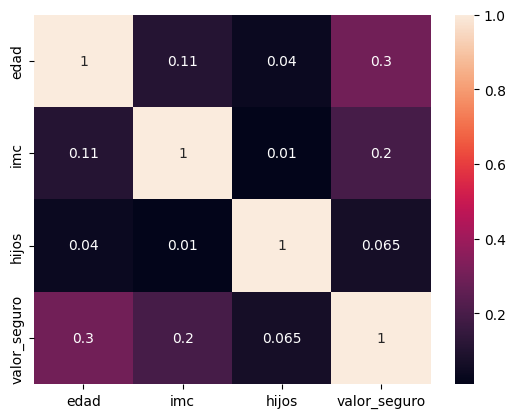

In [21]:
#Plotting
correlacion = df.corr()
correlacion
sb.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)

As shown in Figure above, the variables with the closest relationship to the value of 1 are age and body mass index (BMI) in relation to the amount paid to the insurance company. These relationships become more significant as the value approaches 1.

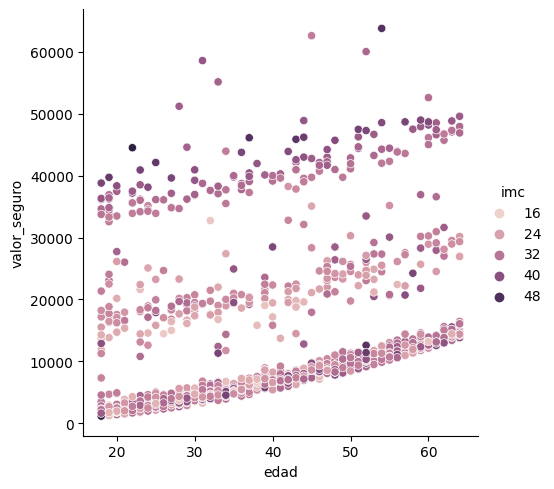

In [22]:
sb.relplot(x='edad' ,y='valor_seguro',hue='imc',data=df)

As observed in the figure above, the highest values paid correspond to all age ranges with a high body mass index.

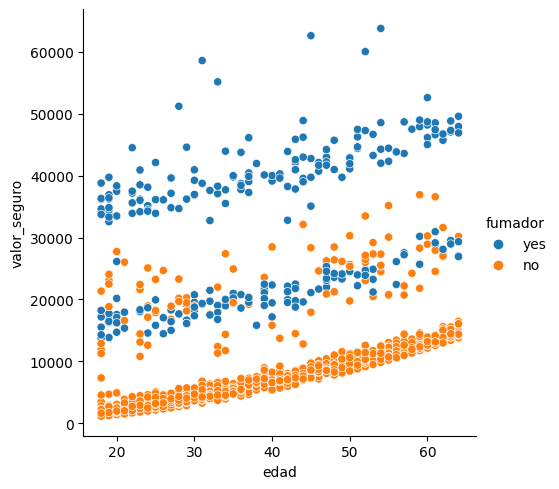

In [23]:
sb.relplot(x='edad',y='valor_seguro',hue='fumador',data=df)

Clearly, as seen in figure above, being a smoker is a determining factor in the amount paid for insurance, regardless of age range.

<Axes: xlabel='region', ylabel='valor_seguro'>

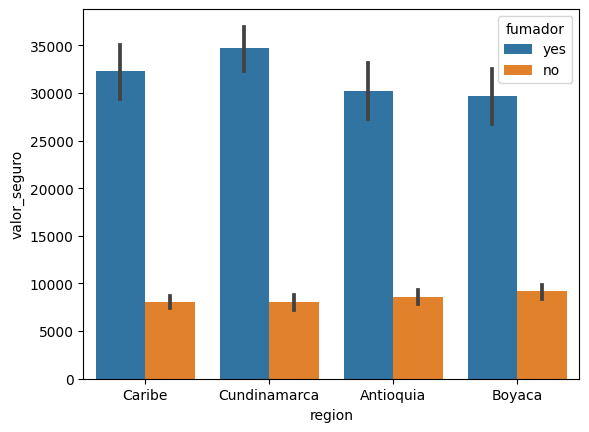

In [24]:
sb.barplot(data=df,x='region',y='valor_seguro',hue='fumador')

To establish relationships between the paid value, smoking status, and region, it is necessary to execute the following command to determine the relationship by regions and paid values, as shown in figure above.